In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import LambdaCallback
from tensorflow.keras import regularizers

In [2]:
df = pd.read_csv('SpectroFood_dataset.csv')
columns_to_drop = ['Leek'] 

df = df.drop(columns=columns_to_drop)
df = df.iloc[0:288] 

In [3]:
X = df.to_numpy()
y = X[:, 0]

X.shape, y.shape

((288, 422), (288,))

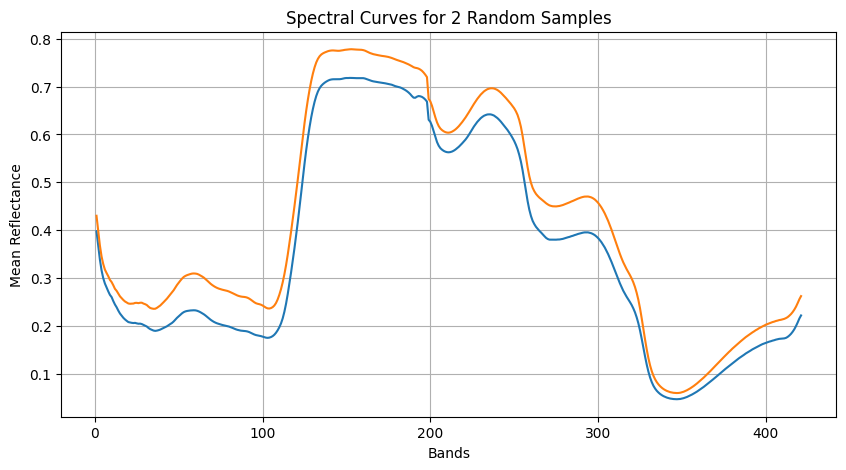

In [5]:
def plot_random_spectral_curves(X, num_samples=2):
    
    # Randomly choose `num_samples` rows
    random_indices = np.random.choice(X.shape[0], num_samples, replace=False)

    # Set up the plot
    plt.figure(figsize=(10, 5))

    for i, idx in enumerate(random_indices):
        
        # Extract the spectral values (excluding the label)
        spectral_values = X[idx, 1:]

        # Create the x-axis for wavelength index (1 to 300)
        wavelengths = np.arange(1, spectral_values.shape[0] + 1)

        # Plot the spectral curve
        plt.plot(wavelengths, spectral_values)


    plt.title(f"Spectral Curves for {num_samples} Random Samples")
    plt.xlabel("Bands")
    plt.ylabel("Mean Reflectance")
    plt.grid(True)
    plt.show()
    
plot_random_spectral_curves(X) 

In [ ]:
print(X[287])

['0.092920354' 0.40107992 0.3716417 0.34055114 0.31654564 0.29983824
 0.28847727 0.27968615 0.27154487 0.26409483 0.25896522 0.25018626
 0.24260813 0.23676577 0.2290564 0.22268495 0.21793658 0.2129245
 0.20900697 0.20550524 0.20207995 0.20063852 0.19948794 0.19895022
 0.19915801 0.19810997 0.19755124 0.19840273 0.19762132 0.1959446
 0.19456264 0.19215623 0.18831523 0.18547754 0.18358576 0.18186115
 0.18133198 0.1823115 0.18386662 0.18592873 0.1886018 0.19121742
 0.19350766 0.19616792 0.1993005 0.20193611 0.20472923 0.20852831
 0.21303831 0.21719874 0.220867 0.22476397 0.22846562 0.2312523 0.23307273
 0.23432373 0.23516533 0.23577909 0.23629747 0.23646322 0.23618816
 0.23528811 0.23382911 0.23190445 0.22959156 0.22703196 0.22395809
 0.22061408 0.21731049 0.21422444 0.21148244 0.20905723 0.20714751
 0.20562121 0.20430815 0.20302203 0.20191997 0.20106784 0.20035703
 0.19954456 0.19826111 0.19683802 0.19530445 0.19373587 0.19222409
 0.19092757 0.18995874 0.18920964 0.18873316 0.18846445 0.

In [6]:
print(y)

['0.168032787' '0.171717172' '0.145' '0.160655738' '0.147435897'
 '0.155660377' '0.147058824' '0.140350877' '0.138888889' '0.155279503'
 '0.165354331' '0.157894737' '0.171568627' '0.13125' '0.141891892'
 '0.130890052' '0.12109375' '0.141463415' '0.141025641' '0.112582781'
 '0.111801242' '0.12039312' '0.097777778' '0.119047619' '0.133891213'
 '0.114942529' '0.121863799' '0.082191781' '0.110759494' '0.130872483'
 '0.125541126' '0.091836735' '0.107142857' '0.103585657' '0.094594595'
 '0.107142857' '0.097276265' '0.097058824' '0.1' '0.120481928'
 '0.114427861' '0.1' '0.098245614' '0.087962963' '0.111111111'
 '0.104417671' '0.098113208' '0.122727273' '0.102310231' '0.123745819'
 '0.095833333' '0.100628931' '0.113636364' '0.104294479' '0.094488189'
 '0.129746835' '0.085365854' '0.097744361' '0.098039216' '0.099033816'
 '0.110759494' '0.115384615' '0.105405405' '0.1' '0.114893617'
 '0.101910828' '0.103773585' '0.103603604' '0.094170404' '0.098684211'
 '0.101265823' '0.081168831' '0.082125604'

In [7]:
#Scaling
scaler = StandardScaler()
scaler.fit(X)

Xn = scaler.transform(X)

In [8]:
# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape,X_test.shape, y_test.shape

((230, 422), (230,), (58, 422), (58,))

In [9]:
print(X_train.dtype, X_test.dtype, y_test.dtype, y_train.dtype)

float64 float64 object object


In [10]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

print(X_train.dtype, X_test.dtype, y_test.dtype, y_train.dtype)

float64 float64 float64 float64


In [ ]:
#KNN Regressor
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# KNN
knn_reg = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator = knn_reg, param_grid = param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search_knn.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [12]:
#MSE
best_model = grid_search_knn.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0005588215467829418


In [13]:
# Train XGBoost Regressor
xgb_reg = XGBRFRegressor()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8],
    'colsample_bynode': [0.5, 0.7]
}

xgb_search = RandomizedSearchCV(estimator = xgb_reg, param_distributions = param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)

best_params = xgb_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bynode': 0.7}


In [14]:
#MSE
best_model = xgb_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0005975074394928082


In [ ]:
#SVR
param_dist = {
    
    'C': [0.1, 1, 10, 100],         
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5], 
    'coef0': [0.0, 0.1, 0.5, 1.0] 
    
}

#SVR
svr = SVR()
svr_random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
svr_random_search.fit(X_train, y_train)

# Get best parameters for XGBoost Classifier
best_params = svr_random_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 0.1, 'C': 10}


In [16]:
best_model = svr_random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0009708631871109319


In [17]:
config = tf.compat.v1.ConfigProto(gpu_options =
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
)

config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  1


In [ ]:
#NN
tf.random.set_seed(1234)

model = Sequential([
    
    tf.keras.Input(shape=(422,)),  
    
    Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='layer1'),
    Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='layer2'),
    Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='layer3'),

    Dense(units=1, activation='linear', name='output_layer')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                13536     
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
model.compile(
    
    loss = MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2)
)

# Training
model.fit(
    
    X_train, y_train,
    batch_size=500,
    epochs=1000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=500,
            restore_best_weights=True
        )
    ]
)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1.4252
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.1942
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7740
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6979
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7606
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7489
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6942
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6631
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6709
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6879
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6865
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6694
Epoch 13/1000
1/1 [==============================]

In [20]:
#MSE
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

2/2 [==============================] - 0s 5ms/step
Mean Squared Error: 0.0001574663203230097
